In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mmcv import load, dump
import cv2
from pyskl.datasets.pipelines import PreNormalize3D

annotations = load('../data/nturgbd/ntu60_3danno.pkl')['annotations']

# Example data: 25 joints with 3 coordinates each
num_joints = 25
num_dimensions = 3
# data = np.random.rand(num_joints, num_dimensions)

/home/trungct/miniconda3/envs/pyskl/lib/python3.7/site-packages/requests/__init__.py:114: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (5.1.0)/charset_normalizer (3.1.0) doesn't match a supported version!
  RequestsDependencyWarning,


In [14]:
with open('../tools/data/label_map/nturgbd_120.txt', 'r') as file:
    label_names = [line.strip() for line in file]

In [10]:
import copy as cp
import cv2
import matplotlib.pyplot as plt
import moviepy.editor as mpy
import mpl_toolkits.mplot3d.axes3d as p3
import numpy as np
from matplotlib.animation import FuncAnimation
from mmcv import load
from tqdm import tqdm

from pyskl.smp import h2r

def Vis3DPose(item, layout='nturgb+d', fps=12, angle=(30, 45), fig_size=(8, 8), with_grid=False):
    kp = item['keypoint'].copy()
    colors = ('#3498db', '#000000', '#e74c3c')  # l, m, r

    assert layout == 'nturgb+d'
    if layout == 'nturgb+d':
        num_joint = 25
        kinematic_tree = [
            [1, 2, 21, 3, 4],
            [21, 9, 10, 11, 12, 25], [12, 24],
            [21, 5, 6, 7, 8, 23], [8, 22],
            [1, 17, 18, 19, 20],
            [1, 13, 14, 15, 16]
        ]
        kinematic_tree = [[x - 1 for x in lst] for lst in kinematic_tree]
        colors = ['black', 'blue', 'blue', 'red', 'red', 'darkblue', 'darkred']
        colors = ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']

    assert len(kp.shape) == 4 and kp.shape[3] == 3 and kp.shape[2] == num_joint
    x, y, z = kp[..., 0], kp[..., 1], kp[..., 2]
    min_x, max_x = min(x[x != 0]), max(x[x != 0])
    min_y, max_y = min(y[y != 0]), max(y[y != 0])
    min_z, max_z = min(z[z != 0]), max(z[z != 0])

    max_axis = max(max_x - min_x, max_y - min_y, max_z - min_z)
    mid_x, mid_y, mid_z = (min_x + max_x) / 2, (min_y + max_y) / 2, (min_z + max_z) / 2

    min_x, max_x = mid_x - max_axis / 2, mid_x + max_axis / 2
    min_y, max_y = mid_y - max_axis / 2, mid_y + max_axis / 2
    min_z, max_z = mid_z - max_axis / 2, mid_z + max_axis / 2

    fig = plt.figure(figsize=fig_size)
    ax = p3.Axes3D(fig)

    ax.set_xlim3d([min_x, max_x])
    ax.set_ylim3d([min_y, max_y])
    ax.set_zlim3d([min_z, max_z])
    ax.view_init(*angle)
    fig.suptitle(item.get('frame_dir', 'demo'), fontsize=20)

    def update(t):
        # ax.lines = []
        ax.view_init(*angle)
        for i, (chain, color) in enumerate(zip(kinematic_tree, colors)):
            linewidth = 2.0
            for j in range(kp.shape[0]):
                ax.plot3D(kp[j, t, chain, 0], kp[j, t, chain, 1], kp[j, t, chain, 2], linewidth=linewidth, color=color)
        if not with_grid:
            plt.axis('off')
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_zticklabels([])
    update(10)
    plt.show()

sneeze/cough


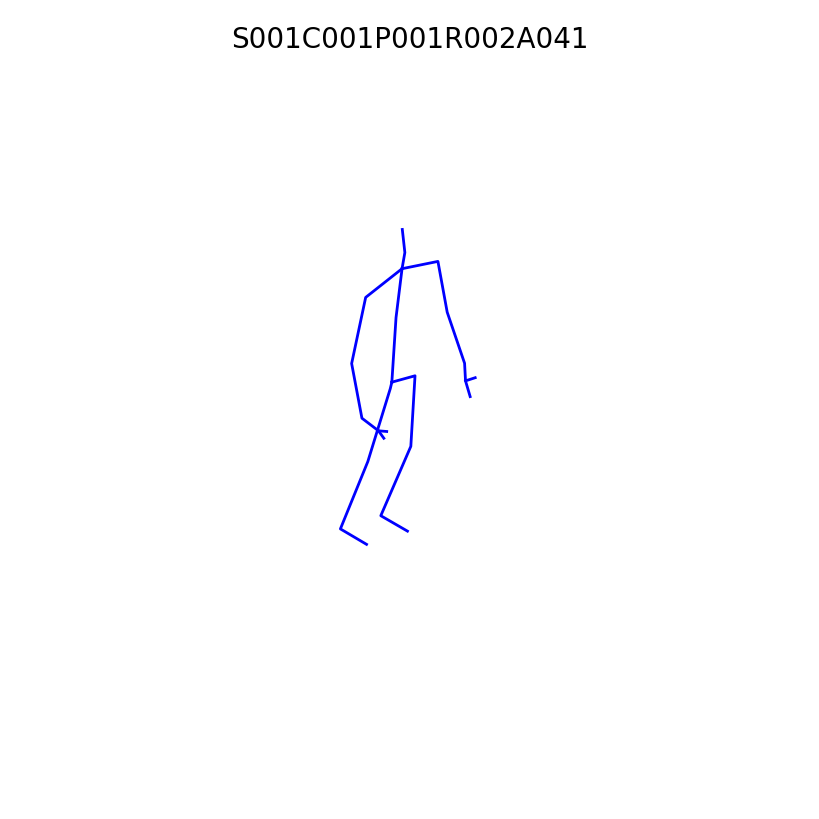

In [16]:
# Visualize 3D Skeletons
index = 100
anno = annotations[index]
print(label_names[anno['label']])
anno = PreNormalize3D()(anno)  # * Need Pre-Normalization before Visualization
Vis3DPose(anno, layout='nturgb+d', fps=12, angle=(30, 45), fig_size=(8, 8), with_grid=False)